Develop a model to predict customer churn for a subscription-
based service or business.

Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
dataset = pd.read_csv('./Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
dataset.shape

(10000, 14)

In [78]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [79]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [80]:
dataset.select_dtypes(include=['object'])

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [81]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

RowNumber and CustomerId does not effect the exited state of the customer 

Compare the both salary and balance of the customer

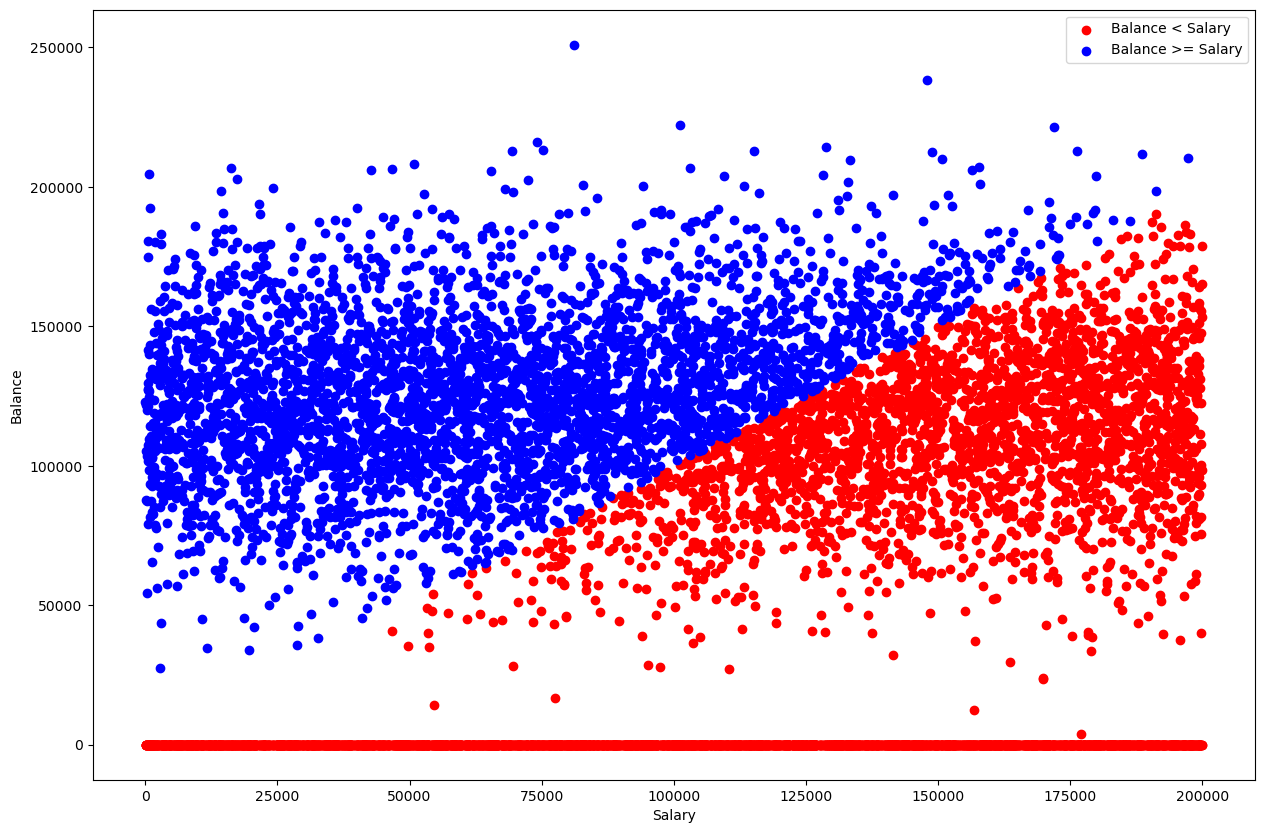

In [82]:
x = dataset['EstimatedSalary']
y = dataset['Balance']
mask = y < x
plt.figure(figsize=(15,10))
plt.scatter(x[mask], y[mask], color='red', label='Balance < Salary')
plt.scatter(x[~mask], y[~mask], color='blue', label='Balance >= Salary')
plt.xlabel("Salary")
plt.ylabel("Balance")
plt.legend()
plt.show()


In [84]:
zero_batch = dataset[ (dataset['Balance']==0) & (dataset['IsActiveMember']==0) ]
zero_batch2 = dataset[ (dataset['Balance']==0) & (dataset['IsActiveMember']==1) ]
print("Customer has Zero balance and with not active member ",len(zero_batch))
print("Customer has Zero balance and with active member ",len(zero_batch2))

Customer has Zero balance and with not active member  1744
Customer has Zero balance and with active member  1873


In [85]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Gender', ylabel='Exited'>

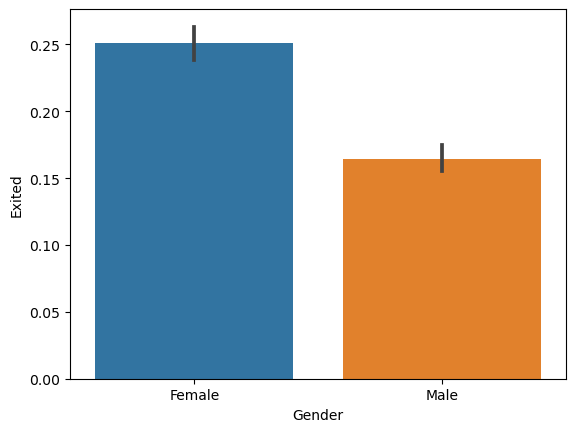

In [88]:
sns.barplot(x='Gender',y='Exited',data=dataset)

<Axes: xlabel='Geography', ylabel='Exited'>

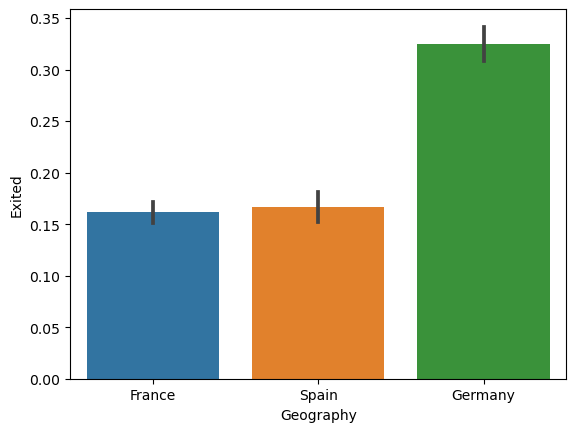

In [89]:
sns.barplot(x='Geography',y='Exited',data=dataset)

<Axes: xlabel='IsActiveMember', ylabel='Exited'>

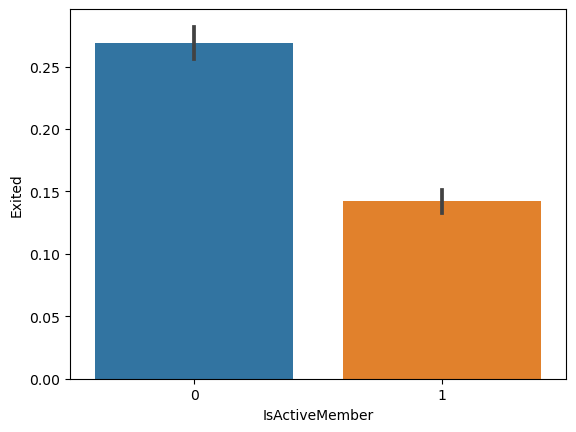

In [90]:
sns.barplot(x='IsActiveMember',y='Exited',data=dataset)

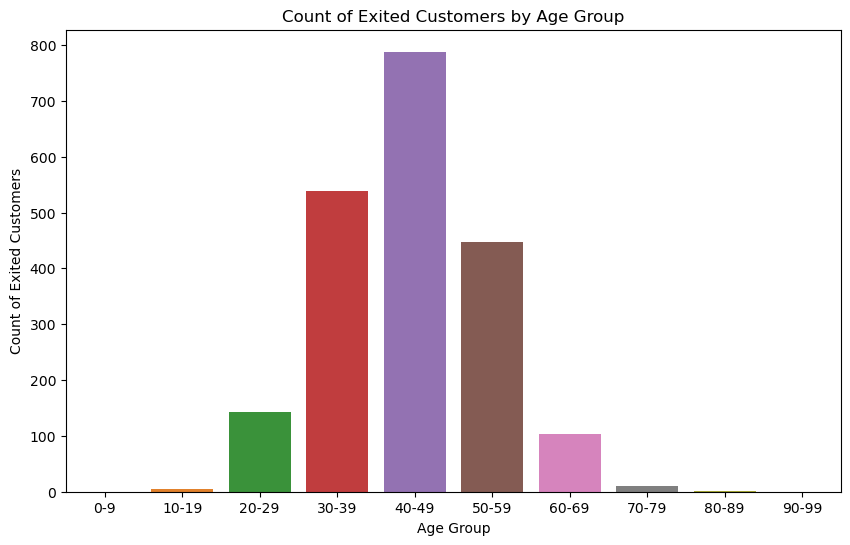

In [91]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_groups = pd.cut(dataset['Age'], bins=age_bins, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
age_grouped_data = dataset.groupby(age_groups)['Exited'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Exited', data=age_grouped_data)
plt.xlabel('Age Group')
plt.ylabel('Count of Exited Customers')
plt.title('Count of Exited Customers by Age Group')
plt.show()


In [86]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Surname','Geography','Gender'])
encoded_dataset = encoder.fit_transform(dataset)

In [93]:
corr_matrix  = encoded_dataset.corr()
corr_matrix['Exited'].sort_values()

IsActiveMember    -0.156128
Gender            -0.106512
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
Surname           -0.004039
EstimatedSalary    0.012097
Balance            0.118533
Geography          0.153771
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [94]:
encoded_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,2,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,3,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,4,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,5,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [95]:
X = encoded_dataset.drop(['RowNumber','CustomerId','Exited'],axis=1)
Y = encoded_dataset['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

pip_rfc = Pipeline([
    ('scalar',StandardScaler()),
    ('poly',PolynomialFeatures()),
    ('rfc',RandomForestClassifier(max_depth=10,n_estimators=25,verbose=0,random_state=42))
])
pip_rfc.fit(x_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('rfc',
                 RandomForestClassifier(max_depth=10, n_estimators=25,
                                        random_state=42))])

In [108]:
from sklearn.metrics import accuracy_score,classification_report
pred_rfc = pip_rfc.predict(x_test)
print("RandomForestClassifier ")
print("--------------------------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred_rfc,y_test))
print("Calssification Report : \n",classification_report(pred_rfc,y_test))

RandomForestClassifier 
--------------------------------------------------------------
Accuracy Score :  0.871
Calssification Report : 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1779
           1       0.45      0.76      0.57       221

    accuracy                           0.87      2000
   macro avg       0.71      0.82      0.75      2000
weighted avg       0.91      0.87      0.88      2000



In [107]:
from sklearn.linear_model import LogisticRegression

pip_lr = Pipeline([
    ('scalar',StandardScaler()),
    ('linear',LogisticRegression())
])
pip_lr.fit(x_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('linear', LogisticRegression())])

In [110]:
pred_lr = pip_lr.predict(x_test)
print("Logistic Regression ")
print("--------------------------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred_lr,y_test))
print("Calssification Report : \n",classification_report(pred_lr,y_test))

Logistic Regression 
--------------------------------------------------------------
Accuracy Score :  0.822
Calssification Report : 
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      1857
           1       0.22      0.57      0.31       143

    accuracy                           0.82      2000
   macro avg       0.59      0.70      0.61      2000
weighted avg       0.91      0.82      0.86      2000



In [111]:
from sklearn.ensemble import GradientBoostingClassifier

pip_gdc = Pipeline([
    ('scalar',StandardScaler()),
    ('poly',PolynomialFeatures()),
    ('Gradient',GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,max_depth=5,random_state=42))
])
pip_gdc.fit(x_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('Gradient',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                            random_state=42))])

In [112]:
pred_gdc = pip_gdc.predict(x_test)
print("Logistic Regression ")
print("--------------------------------------------------------------")
print("Accuracy Score : ",accuracy_score(pred_gdc,y_test))
print("Calssification Report : \n",classification_report(pred_gdc,y_test))

Logistic Regression 
--------------------------------------------------------------
Accuracy Score :  0.862
Calssification Report : 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      1847
           1       0.34      0.82      0.48       153

    accuracy                           0.86      2000
   macro avg       0.66      0.84      0.70      2000
weighted avg       0.93      0.86      0.89      2000

